In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import beta

#  Multiarm Bandits

Exercice: Propose a 500 trials experiment with a swith of arms success on iteration 250. Code and analize the results

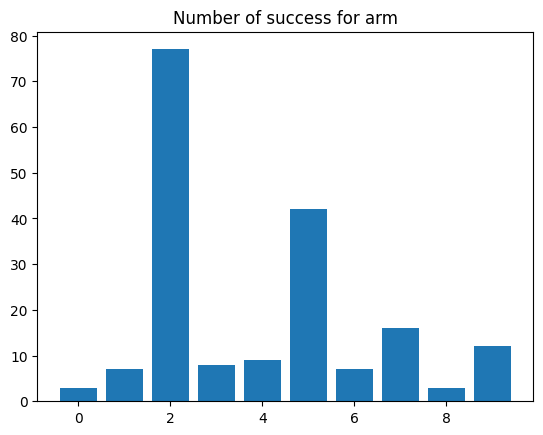

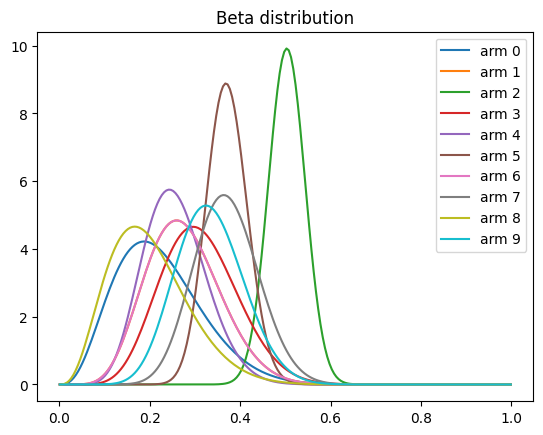

In [2]:
# Se define el número de "brazos" o opciones que tiene el multiarm bandit. En este caso, hay 10 brazos.
n_arms = 10

# Se definen dos vectores, betas y alphas, con el mismo número de elementos que n_arms, todos inicializados en 1
betas = np.ones(n_arms)
alphas = np.ones(n_arms)

# Se crean dos vectores, trials y success, también con el mismo número de elementos que n_arms, inicializados en 0
# Estos vectores se utilizarán para realizar un seguimiento del número de intentos y el número de éxitos para cada "brazo".
trials = np.zeros(n_arms, dtype=np.int16)      # estos son vectores
success = np.zeros(n_arms, dtype=np.int16)

best_arms = []   # Se inicializa una lista vacía para almacenar los brazos seleccionados como los mejores en cada ronda.

# Se inicia un bucle que se ejecutará durante 500 rondas. Esto representa la cantidad de veces que se tomarán decisiones o se realizarán experimentos.
for round in range(500):

    #Se generan muestras de una distribución beta para cada "brazo", utilizando los parámetros alphas, betas, trials y success. Estas muestras representan las probabilidades estimadas de éxito para cada "brazo".
    theta = np.random.beta(alphas + success, betas + trials - success)

    # Se selecciona el "brazo" con la mayor probabilidad estimada de éxito
    best_arm = np.argmax(theta)
    # print("Best arm %d in round %d" % (best_arm, round))
    # Se incrementa el contador de intentos para el "brazo" seleccionado.
    trials[best_arm] += 1

    # If feedback is positive, success +1

    #  Se inicializa la variable feedback como None. Esta variable se utiliza para almacenar la retroalimentación del usuario sobre la elección del "brazo" en cada ronda
    feedback = None
    # Se verifica si la ronda actual es menor o igual a 250. Esto indica que se encuentra en la primera mitad de las 500 rondas del experimento.
    if round <=250:
      # Si el "brazo" seleccionado como el mejor es el "brazo" número 5, se ejecuta este bloque de código. Esto indica que el "brazo" número 5 es el que más le gusta al usuario.
      if best_arm == 5:  # el que mas gusta al usuario
      # Se genera un número aleatorio entre 0 y 1 y se compara con 0.5. Esto simula la respuesta del usuario, donde hay un 50% de probabilidad de que le guste el resultado si el "brazo" seleccionado es el número 5.
          feedback = np.random.rand() < 0.5
      # Si el "brazo" seleccionado como el mejor no es el "brazo" número 5, se ejecuta este bloque de código.
      else:
          feedback = np.random.rand() < 0.3
      # If positive, success +1 in the given arm
      if feedback:
          success[best_arm] += 1
    else:
      # Si el "brazo" seleccionado como el mejor es el "brazo" número 2, se ejecuta este bloque de código. Esto indica que el "brazo" número 2 es el que más le gusta al usuario después de la iteración 250.
      if best_arm == 2:
        # : Se genera un número aleatorio entre 0 y 1 y se compara con 0.5. Esto simula la respuesta del usuario, donde hay un 50% de probabilidad de que le guste el resultado si el "brazo" seleccionado es el número 2.
          feedback = np.random.rand() < 0.5
      else:
          feedback = np.random.rand() < 0.3
      # If positive, success +1 in the given arm
      # Se verifica si la retroalimentación del usuario es positiva. Si lo es, se incrementa el contador de éxitos (success) para el "brazo" seleccionado.
      if feedback:
          success[best_arm] += 1




plt.bar([i for i in range(n_arms)], success)
plt.title("Number of success for arm")
plt.show()

x = np.linspace(0.001, 0.999, 200)
for arm in range(n_arms):
    y = beta(alphas[arm] + success[arm], betas[arm] + trials[arm] - success[arm]).pdf(x)
    plt.plot(x, y, label="arm {}".format(arm))
plt.legend(loc="upper right")
plt.title("Beta distribution")
plt.show()

**Multiarm Bandits** es una herramienta poderosa para la toma de decisiones bajo incertidumbre en una variedad de aplicaciones practicas, ayudando a maximizar la eficiencia, optimizar el rendimiento y mejorar la satisfaccion del usuario en diferents contexto.

**Analisis y resultados**

Como se puede observar en el gráfico anterior, los brazos con mayor probabilidad de éxito son el brazo **2** y luego el brazo **5**.

Siguiendo las indicaciones del enunciado, llevamos a cabo un experimento de 500 pruebas utilizando un modelo de "Multi-Armed Bandit" (MAB). En este experimento, realizamos un cambio en la tasa de éxito de uno de los brazos a partir de la iteración 250.

Durante cada una de las 500 iteraciones del experimento, seleccionamos el brazo con la mayor probabilidad estimada de éxito, basada en los parámetros alphas, betas, trials y success.

En la primera mitad de las 500 rondas del experimento (es decir, las primeras 250 iteraciones), seleccionamos el brazo 5, ya que se asume que este es el que más le gusta al usuario.

Para la segunda mitad del experimento (las 250 iteraciones restantes), realizamos un cambio y seleccionamos el brazo 2 como el mejor. Este cambio se basa en la observación de que el brazo 2 tiene la mayor probabilidad estimada de éxito después de la iteración 250, lo que indica que es el que más le gusta al usuario en esa etapa del experimento.